In [2]:
#importing necessary libraray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\Data-Science-Capstone-Projects-master\Data-Science-Capstone-Projects-master\Project_2\Project 2\Healthcare - Diabetes\health care diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#infomation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

In [8]:
#descriptive analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


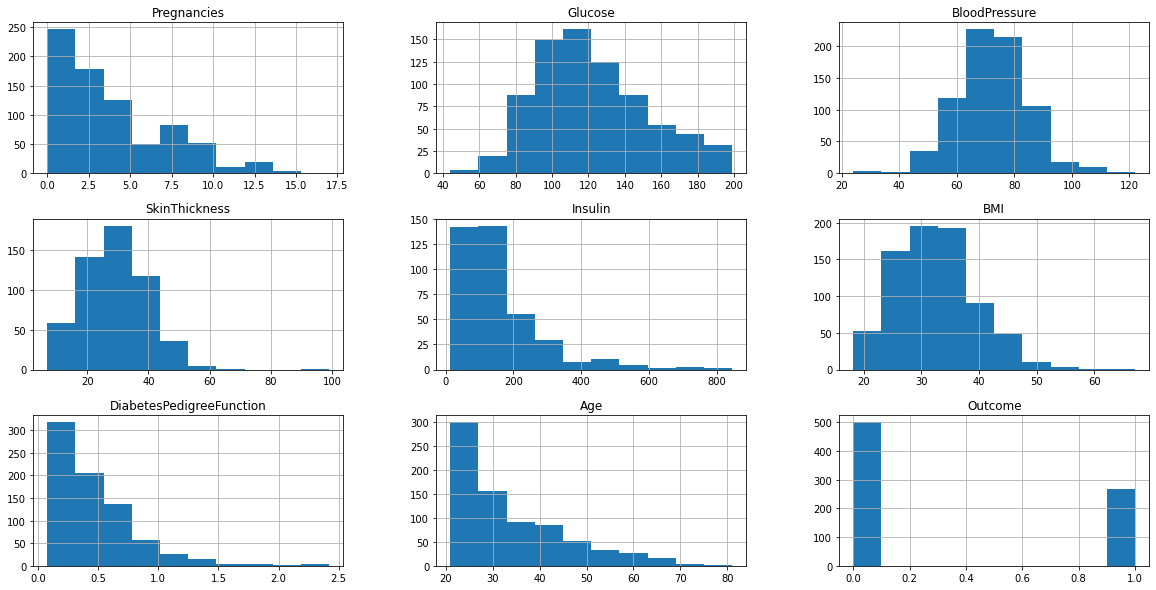

In [11]:
#Project Task: Week 1
#Data Exploration:

#1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

#• Glucose

#• BloodPressure

#• SkinThickness

#• Insulin

#• BMI
#2. Visually explore these variables using histograms. Treat the missing values accordingly.
p = df.hist(figsize=(20,10))

In [12]:
#replacing the zeros with NaN value
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [13]:
#replacing the Nan values with a appropirate strategy
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)


In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


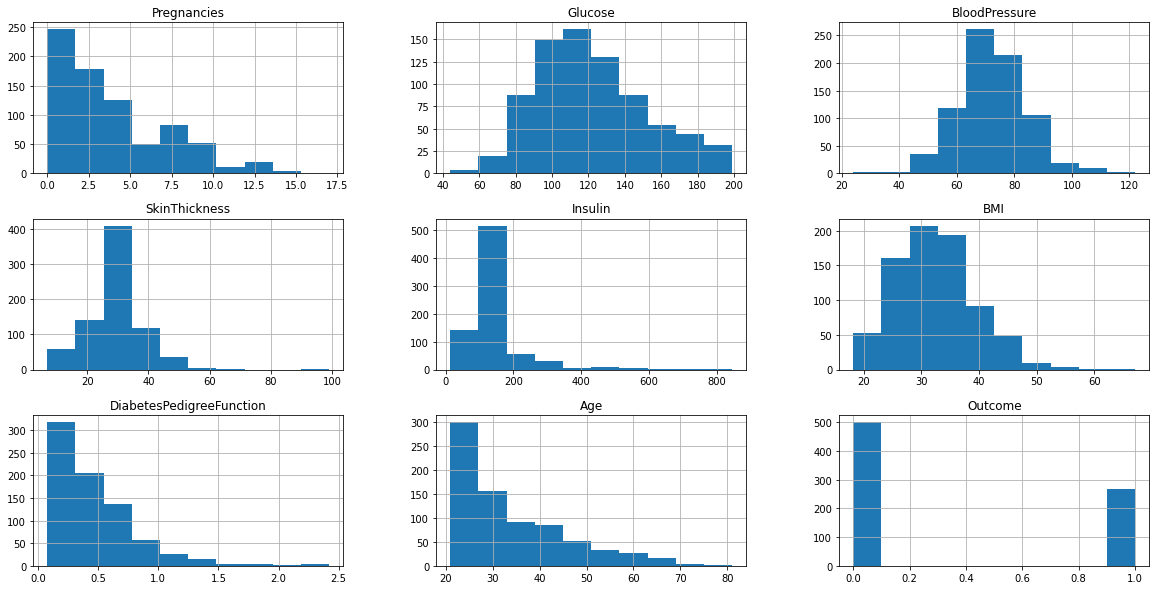

In [15]:
#by using this histogram we can see that we removed the zeros
p = df.hist(figsize=(20,10))

In [16]:
#Missing values
!pip install missingno

In [17]:
import missingno as msno

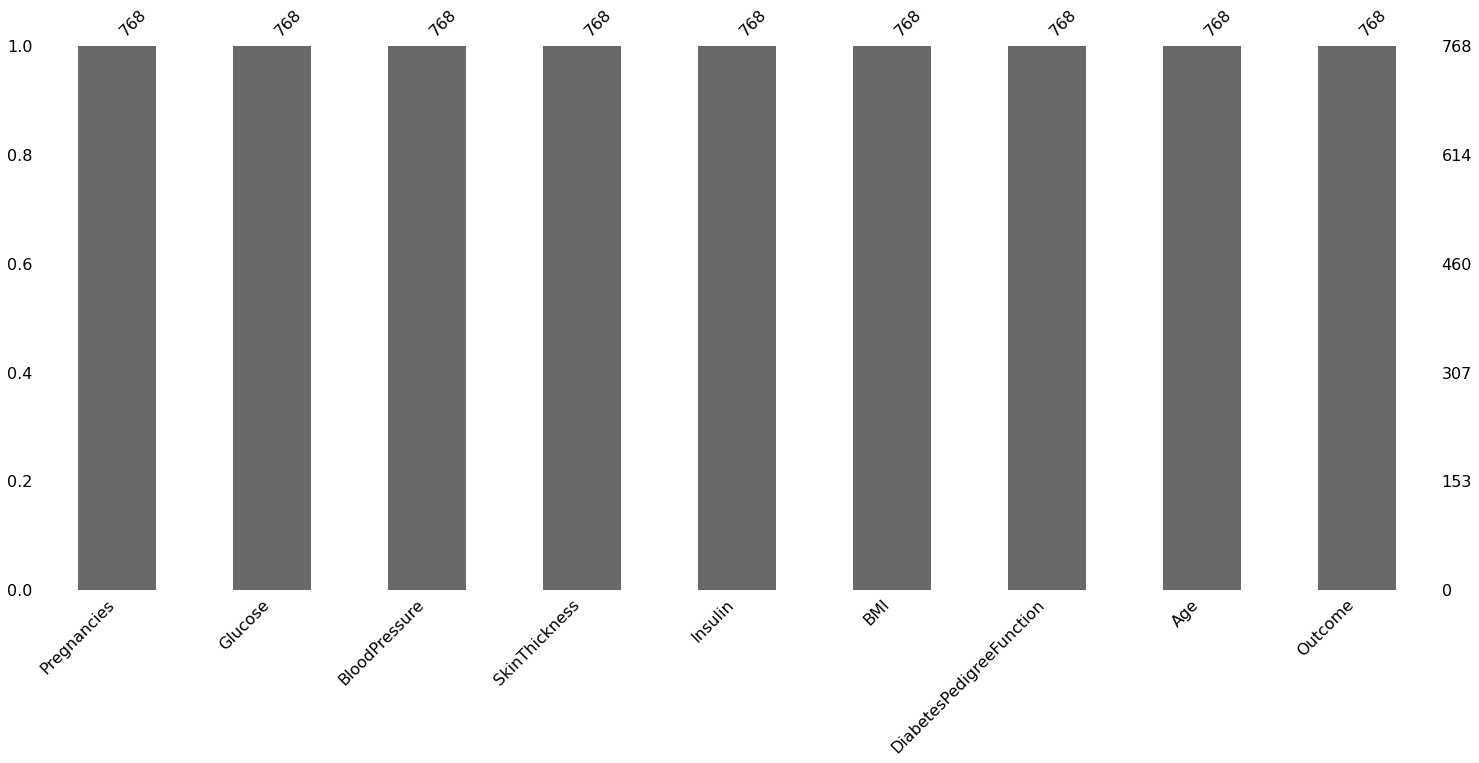

In [18]:
#By seeing the graph we dont have null values
p = msno.bar(df)

In [19]:
df1 = df['Outcome'].value_counts()

In [20]:
df1

0    500
1    268
Name: Outcome, dtype: int64

Text(0, 0.5, 'data_type')

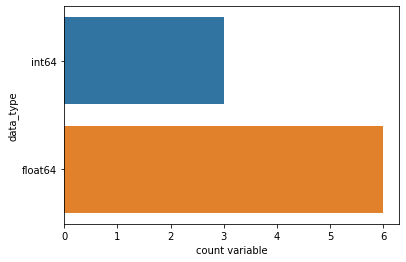

In [21]:
#There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 
import seaborn as sns
df_count = df.dtypes
sns.countplot(y=df_count, data=df)
plt.xlabel('count variable')
plt.ylabel('data_type')

<AxesSubplot: ylabel='Outcome'>

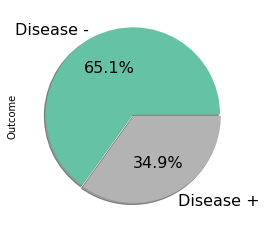

In [22]:
#By seeing this pie plot we are having the 65.1% od the patient are not having the diabetes and 34.9% of the people are having the diabetes
df1.plot.pie(radius = 1, cmap = 'Set2' , explode = [0.01,0.01], shadow = True, autopct = '%1.1f%%',
           textprops = {'family': 'DejaVu Sans','color': 'black','size': 16}, labels = ['Disease -','Disease +'])

<AxesSubplot: xlabel='Outcome', ylabel='count'>

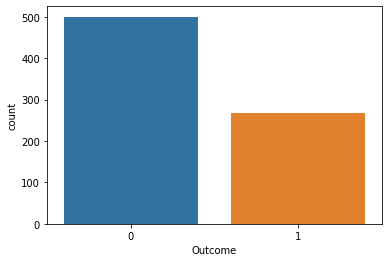

In [23]:
#1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
sns.countplot(x='Outcome', data=df)

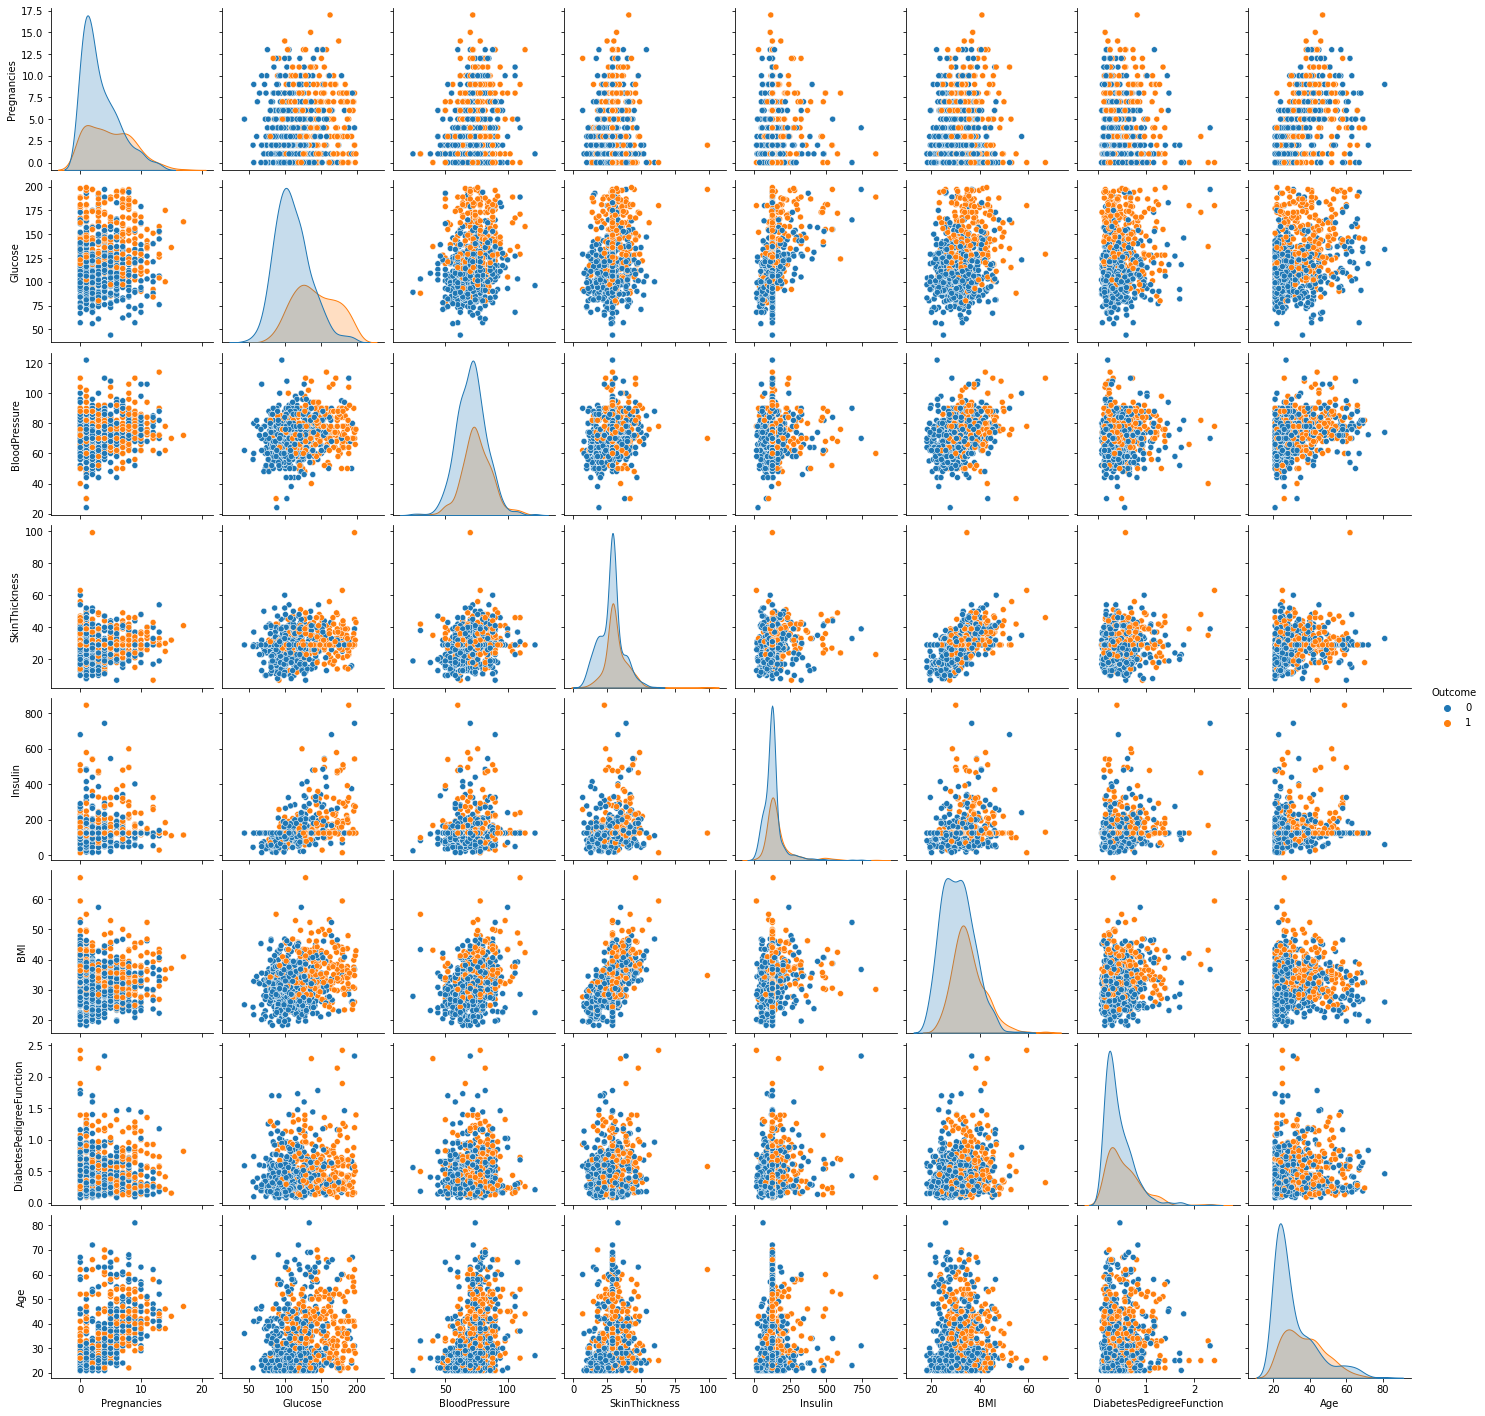

In [24]:
#2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
sns.pairplot(data=df, hue='Outcome')

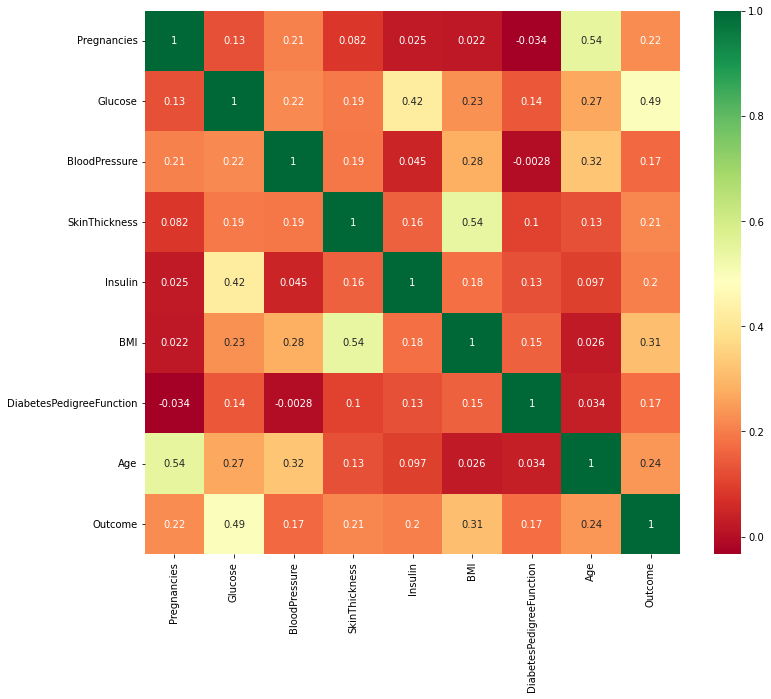

In [25]:
#3. Perform correlation analysis. Visually explore it using a heat map.
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [27]:
df.shape

(768, 9)

In [28]:
#Data preprocessing
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df.drop(['Outcome'], axis=1),), columns=[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])
X.head()                 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [29]:
y = df['Outcome']

In [30]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [31]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [30]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.30,
                                                    random_state=7)

In [31]:
#By seeing the above countplot the data is imbalance using the SMOTE balancing the dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train,Y_train = sm.fit_resample(X, y)

In [62]:
X_train.shape,Y_train.shape

((1000, 8), (1000,))

In [32]:
X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [33]:
Y_train.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [34]:
Project Task: Week 3
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.
from sklearn.ensemble import RandomForestClassifier
rdm = RandomForestClassifier(n_estimators=200)
rdm.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
predictions = rdm.predict(X_test)

In [36]:
from sklearn import metrics
print("Accuracy_Score =", format(metrics.accuracy_score(Y_test, predictions)))

Accuracy_Score = 1.0


In [37]:
predictions1 = rdm.predict(X_train)


In [38]:
print("Accuracy_Score =", format(metrics.accuracy_score(Y_train, predictions1)))

Accuracy_Score = 1.0


In [39]:
Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions))

[[147   0]
 [  0  84]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        84

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



# Our models with both the classifiers are performing well on tarining dataset test data.

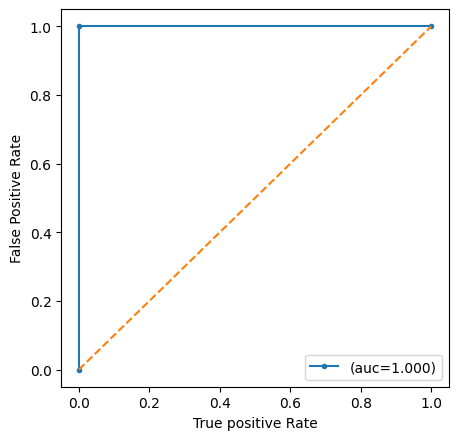

In [43]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(Y_test, predictions)
auc = auc(fpr, tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='(auc=%0.3f)' % auc)
plt.plot([0,1],[0,1], linestyle='--')

plt.xlabel('True positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [44]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [45]:
lr_predict = lr.predict(X_test)

In [46]:
lr.score(X_test, Y_test)

0.7489177489177489

In [47]:
lr.score(X_train, Y_train)

0.755

In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, lr_predict))

[[109  38]
 [ 20  64]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       147
           1       0.63      0.76      0.69        84

    accuracy                           0.75       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.75      0.75       231



# Our models with both the classifiers are performing well on tarining dataset and test dataset

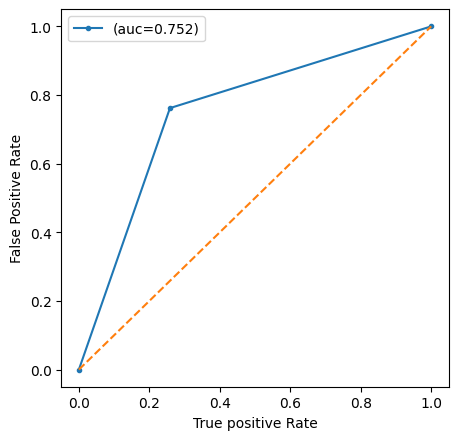

In [50]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(Y_test, lr_predict)
auc = auc(fpr, tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='(auc=%0.3f)' % auc)
plt.plot([0,1],[0,1], linestyle='--')

plt.xlabel('True positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [51]:
from sklearn.svm import SVC
sm = SVC(kernel='rbf', gamma='auto')
sm.fit(X_train, Y_train)

SVC(gamma='auto')

In [52]:
svm_predict = sm.predict(X_test)

In [53]:
sm.score(X_test, Y_test)

0.8225108225108225

In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, svm_predict))

[[115  32]
 [  9  75]]


In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       147
           1       0.70      0.89      0.79        84

    accuracy                           0.82       231
   macro avg       0.81      0.84      0.82       231
weighted avg       0.85      0.82      0.83       231



# Our models with both the classifiers are performing well on tarining dataset and test dataset

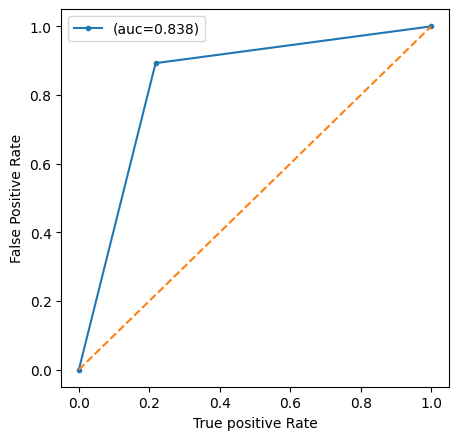

In [56]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(Y_test, svm_predict)
auc = auc(fpr, tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='(auc=%0.3f)' % auc)
plt.plot([0,1],[0,1], linestyle='--')

plt.xlabel('True positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [57]:
#2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [58]:
knn_predict = knn.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, knn_predict))

[[99 48]
 [ 9 75]]


In [60]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       147
           1       0.61      0.89      0.72        84

    accuracy                           0.75       231
   macro avg       0.76      0.78      0.75       231
weighted avg       0.81      0.75      0.76       231



# Comparing all the model with KNN algoritm, Among all algorithm the Ramdom forest is performing well on tarining dataset and good accuracy with test data

In [ ]:
Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

 

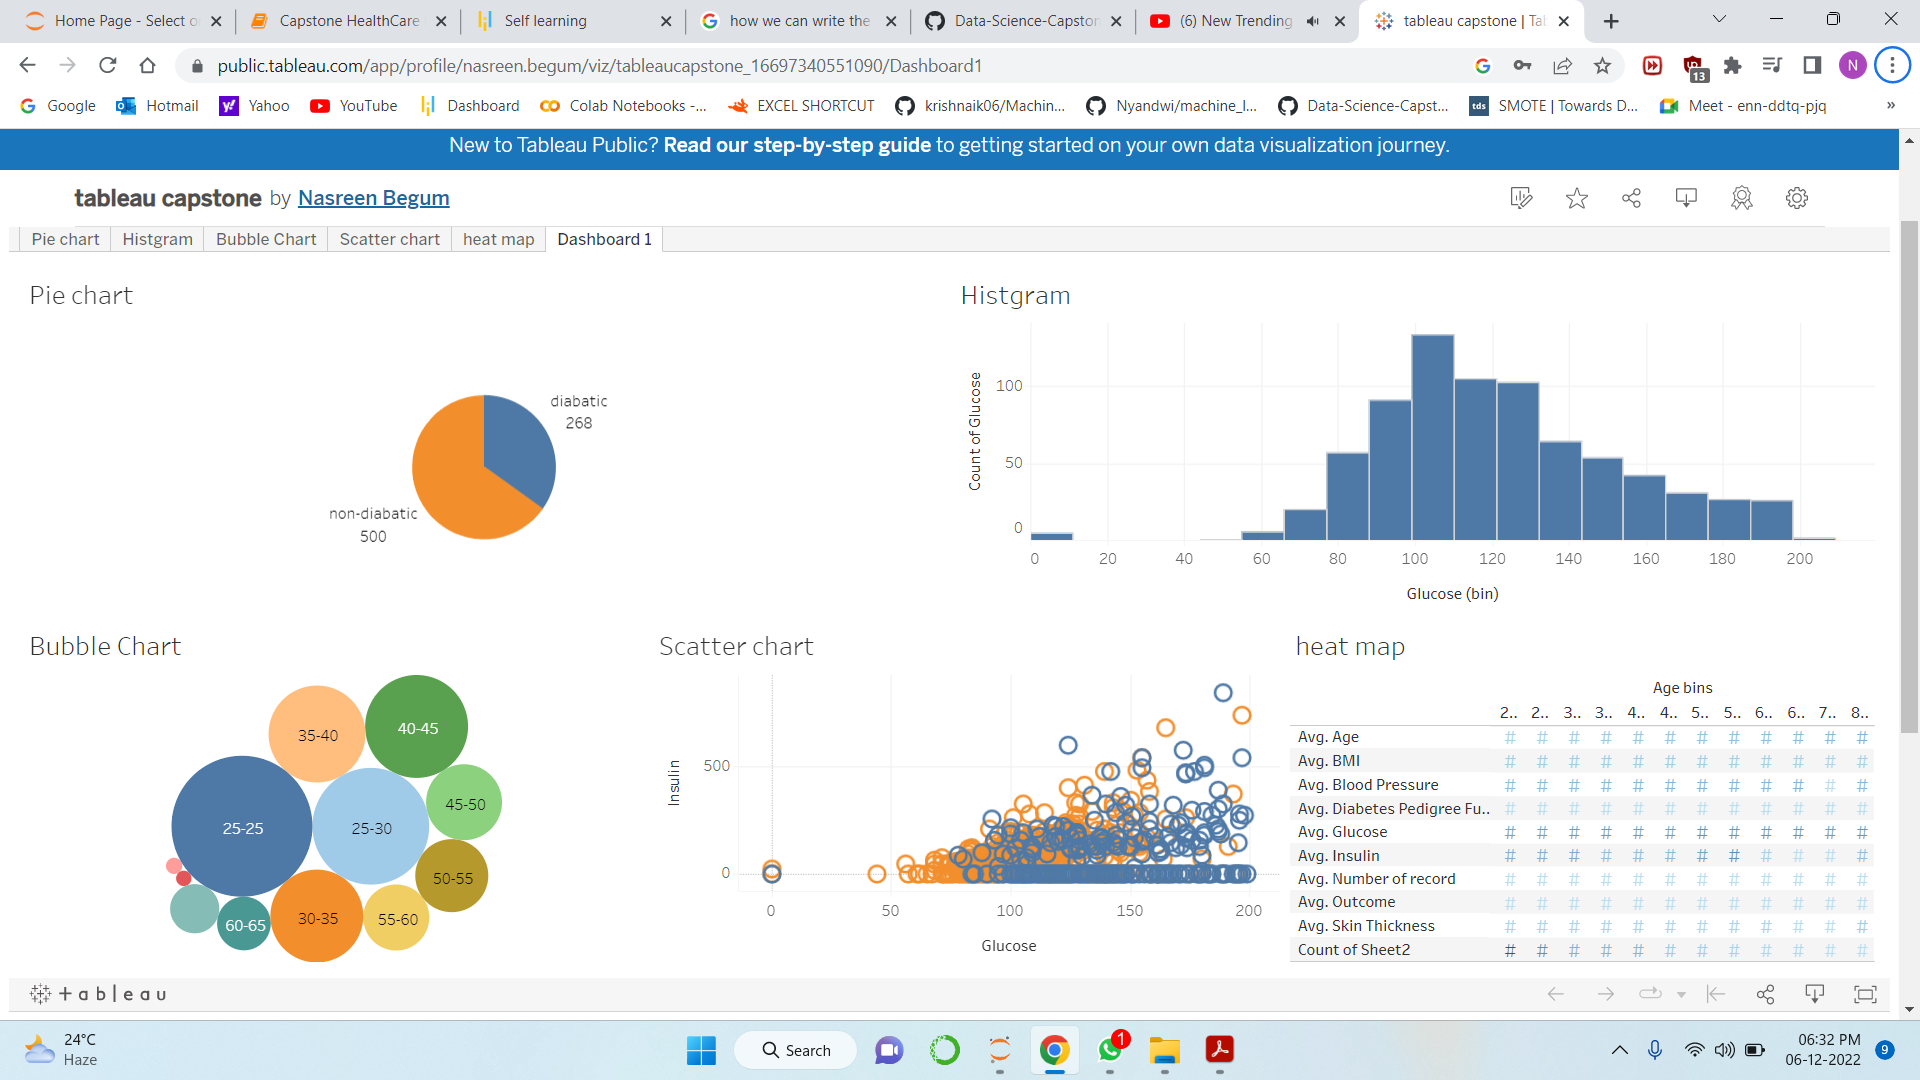

In [70]:
!pip install ipython
from IPython.display import Image
Image(r"C:\Users\Admin\OneDrive\Pictures\Screenshots\Screenshot (162).png")